# データの取得
出力は左から順番に<br>
「その地点の番号(x)」「緯度」「経度」「標高(elevation)」「地点0からの距離」

In [1]:
import numpy as np
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
mtfuji_data = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)

# 一部出力
print(mtfuji_data[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


# 【問題1】断面図の作成
* 断面図をMatplotlibを使い作成
* x=136の地点の赤い点や矢印も表示

In [2]:
import matplotlib.pyplot as plt

# ラベル付け
plt.xlabel('x')
plt.ylabel('evelation(m)')

# 断面図をプロット
plt.plot(mtfuji_data[:,0], mtfuji_data[:,3])

# 各地点を変数定義
x = 136
y = mtfuji_data[136, 3]
u = 50

# 矢印（ベクトル）をプロット
plt.quiver(x - u, y, u, 1, angles='yx',scale_units='xy',scale=1)

# 赤い点をプロット
plt.scatter(x, y, c='r')

# 【問題2】勾配の計算の関数
* 「あなたが今いる地点x」と「その隣の地点x-1」の関係による勾配を求める関数を作成
* 関数が返す値を「今いる地点の勾配」

In [3]:
def calc_gradient(x, data):
    '''
    あなたが今いる地点xを入力すると、その地点の勾配を返却します

    Parameteres
    --------------
    x: int
        あなたが今いる地点(default : 136)
    step: int
        xが移動する量(default : 1)

    Returns
    --------------
    g : float
        xの勾配
    '''
    
    #xの変化量
    x_diff = (x + 1) - x

    #evelationの変化量
    el_diff = data[x + 1, 3] - data[x, 3]
    
    # 勾配を求める
    g = el_diff / x_diff
    
    return g

print(calc_gradient(136, mtfuji_data))
print(calc_gradient(100, mtfuji_data))
print(calc_gradient(150, mtfuji_data))

165.48999999999978
22.66999999999996
-84.38000000000011


# 【問題3】勾配降下法の関数を作成
* 勾配降下法を用いて山を下る関数を作成
* 下る過程をリストに記録
* 「移動すべき地点 = 今いる地点 - α × 今いる地点の勾配」 
* α は0より大きい任意の値をとるハイパーパラメータ

[136, 119, 115, 108, 104, 101, 98, 96, 93, 90, 88, 85, 83, 81, 79, 78, 75, 74, 73, 72]
[3434.59, 1561.94, 1292.52, 1000.24, 883.89, 795.25, 741.17, 700.15, 631.71, 588.99, 553.64, 505.1, 471.82, 443.0, 418.41, 390.14, 371.19, 371.04, 368.91, 355.68]


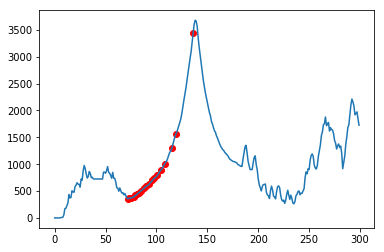

In [4]:
def gradient_descent(x, data, a = 0.1, cnt = 100):
    '''
    あなたが今いる地点xを入力すると、移動毎の標高を記録したリストを返却する

    Parameteres
    --------------
    x: int
        あなたが今いる地点
    a: float
        学習率(任意パラメータ default : 0.1)
    cnt: int
        試行回数(任意パラメータ default : 100)

    Returns
    --------------
    x_list : list
        xの推移を記録したリスト
    el_list : list
        標高の推移を記録したリスト
    '''
    
    # 返却用リスト初期化
    x_list = []
    el_list = []
    
    for i in range(cnt):
        # x地点の標高
        el = data[x, 3]
        
        # 標高リストの要素が2以上かつ一つ前の要素よりも標高が増加している場合
        if len(el_list) > 1 and el >= el_list[i - 1]:
            # フラグをTrueにし、処理をスキップ
            break
        
        # 現時点xをリストに格納
        x_list.append(x)
        
        # x地点の標高をリストに格納
        el_list.append(el)
        
        # 勾配を求める
        g = calc_gradient(x, data)
        
        # xを移動すべき地点に更新
        x = int(x - a * g)

    return x_list, el_list


x_list, el_list = gradient_descent(136, mtfuji_data)

print(x_list)
print(el_list)

# 断面図をプロット
plt.plot(mtfuji_data[:,0], mtfuji_data[:,3])

# 推移を赤い点をプロット
plt.scatter(x_list, el_list, c='r')

# 【問題4】初期値の変更
* 問題3のxを139より大きい値に変更して実施

[139, 148, 157, 160, 165, 166, 169, 171, 173, 174, 175]
[3664.9, 2334.42, 1623.73, 1484.72, 1272.98, 1259.24, 1182.32, 1124.83, 1081.07, 1068.05, 1053.28]


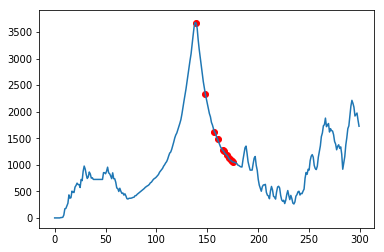

In [5]:
x_list, el_list = gradient_descent(139, mtfuji_data)

print(x_list)
print(el_list)

# 断面図をプロット
plt.plot(mtfuji_data[:, 0], mtfuji_data[:, 3])

# 推移を赤い点をプロット
plt.scatter(x_list, el_list, c='r')

# 【問題5】（アドバンス課題）並列計算
* NumPyのブロードキャストを使って複数のxを並列計算できるように改良する

[ 20. 136. 139. 250.  16. 119. 148. 232.   3. 115. 157. 238.   3. 108.
 160. 232.   3. 104. 165. 238.   3. 101. 166. 232.   3.  98. 169. 238.
   3.  96. 171. 232.   3.  93. 173. 238.   3.  90. 174. 232.   3.  88.
 175. 238.   3.  85. 175. 232.   3.  83. 175. 238.   3.  81. 175. 232.
   3.  79. 175. 238.   3.  78. 175. 232.   3.  75. 175. 238.   3.  74.
 175. 232.]
[ 580.5  3434.59 3664.9   901.57  380.06 1561.94 2334.42  423.72    0.
 1292.52 1623.73  437.7     0.   1000.24 1484.72  423.72    0.    883.89
 1272.98  437.7     0.    795.25 1259.24  423.72    0.    741.17 1182.32
  437.7     0.    700.15 1124.83  423.72    0.    631.71 1081.07  437.7
    0.    588.99 1068.05  423.72    0.    553.64 1053.28  437.7     0.
  505.1  1053.28  423.72    0.    471.82 1053.28  437.7     0.    443.
 1053.28  423.72    0.    418.41 1053.28  437.7     0.    390.14 1053.28
  423.72    0.    371.19 1053.28  437.7     0.    371.04 1053.28  423.72]


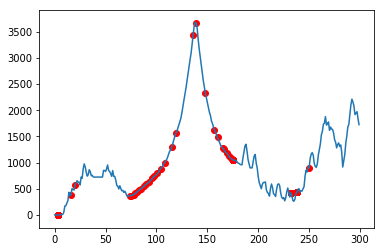

In [6]:
def gradient_descent(x_ary, data, a = 0.1, cnt = 100):
    '''
    あなたが今いる地点xを入力すると、移動毎の標高を記録したリストを返却する

    Parameteres
    --------------
    x_ary: ndarray
        あなたが今いる地点たち
    a: float
        学習率(任意パラメータ default : 0.1)
    cnt: int
        試行回数(任意パラメータ default : 100)

    Returns
    --------------
    x_list : list
        xの推移を記録したリスト
    el_list : list
        標高の推移を記録したリスト
    '''
    
    # 返却用リスト初期化
    x_list = np.array([])
    el_list = np.array([])
    
    
    
    # 標高のnumpy配列を作成
    el_ary = np.array(data[x_ary, 3])
    
    for i in range(cnt):
        # 2回目以降のループかつ一つ前の要素よりも標高が増加している場合
        if i > 1 and sum(data[x_ary, 3]) >= sum(el_ary):
            # フラグをTrueにし、処理をスキップ
            break

        # el_aryの中身を更新
        el_ary = np.array(data[x_ary, 3])
        
        # listの末尾に追加
        el_list = np.append(el_list, el_ary)
        
        # 現時点xをリストに格納
        x_list = np.append(x_list, x_ary)

        # 勾配を求める
        g = calc_gradient(x_ary, data)
        
        # x_aryの中身を更新
        x_ary = np.array((x_ary - a * g), np.int32)
        
        # 負の値であれば0に
        x_ary = np.where(x_ary < 0, 0, x_ary)
        
        i = i + 1

    return x_list, el_list


# xの初期値を複数指定
x_ary = np.array([20, 136, 139, 250])

x_list, el_list = gradient_descent(x_ary, mtfuji_data)

print(x_list)
print(el_list)

# 断面図をプロット
plt.plot(mtfuji_data[:, 0], mtfuji_data[:, 3])

# 推移を赤い点をプロット
plt.scatter(x_list, el_list, c='r')

# 【問題6】（アドバンス課題）ハイパーパラメータの検証
* 検証のための一例 : 横軸を α 、縦軸を一定回の繰り返し後のxや標高にした散布図を描いてみるという方法

0.1
[136. 119. 115. 108. 104. 101.  98.  96.  93.  90.  88.  85.  83.  81.
  79.  78.  75.  74.  73.  72.]
0.2
[136. 102.  93.  87.  83.  79.  78.  72.]
0.30000000000000004
[136.  86.  80.  73.  72.]
0.4
[136.  69.]
0.5
[136.  53.  61.  66.]
0.6
[136.  36.]
0.7000000000000001
[136.  20.   0.]
0.8
[136.   3.]
0.9
[136.   0.]


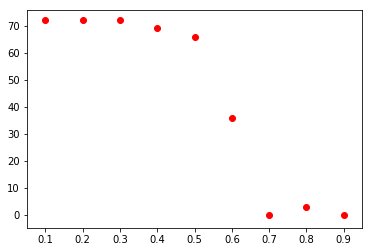

In [7]:
# x=136のみでやってみる
x_ary = np.array([136])

for a in np.arange(0.1, 1, 0.1):
    x_list, el_list = gradient_descent(x_ary, mtfuji_data, a)
    print(a)
    print(x_list)
    # xの推移を赤い点をプロット
    plt.scatter(a, x_list[-1], c='r')

0.1
[3434.59 1561.94 1292.52 1000.24  883.89  795.25  741.17  700.15  631.71
  588.99  553.64  505.1   471.82  443.    418.41  390.14  371.19  371.04
  368.91  355.68]
0.2
[3434.59  817.62  631.71  536.54  471.82  418.41  390.14  355.68]
0.30000000000000004
[3434.59  519.54  420.6   368.91  355.68]
0.4
[3434.59  454.21]
0.5
[3434.59  849.52  564.02  462.33]
0.6
[3434.59  748.39]
0.7000000000000001
[3434.59  580.5     0.  ]
0.8
[3434.59    0.  ]
0.9
[3434.59    0.  ]


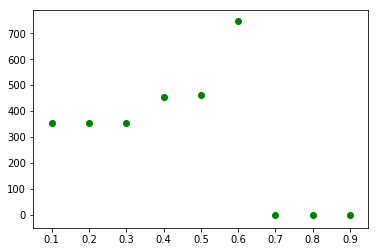

In [8]:
for a in np.arange(0.1, 1, 0.1):
    x_list, el_list = gradient_descent(x_ary, mtfuji_data, a)
    print(a)
    print(el_list)
    # xの推移を赤い点をプロット
    plt.scatter(a, el_list[-1], c='g')

# 【問題7】（アドバンス課題）局所最適解
* 局所的最適解 = ある範囲においての最適解
* 対してグラフ全体の最適解は全体最適解という
* 今回の富士下山であればxの50~150間の局所的最適解は355.68、全体最適解は0(=海)

* 対策としては初期値x・パラメータαを複数試す・更新して一番標高が低いものを採用する？

In [34]:
# ランダムで5このxを格納
x_ary = np.random.randint(100, 200, 5)

for a in np.arange(0.1, 1, 0.1):
    x_list, el_list = gradient_descent(x_ary, mtfuji_data, a)
    lowest_el = min(el_list)
    
    if lowest_el == 0:
        print('山降りれた')
        print(a)
        print(x_list)
        print(el_list)
        break        

山降りれた
0.6
[144. 119. 133. 108. 128. 234.  97.  61.  87.  56. 244.  87.  68.  76.
   0.]
[2864.56 1561.94 2967.9  1000.24 2306.85  278.95  725.72  564.02  536.54
  738.97  502.93  536.54  429.49  377.62    0.  ]
